## Installing Packages

In [3]:
# Installing necessary libraries for analysis
!pip install pandas
!pip install scikit-learn 
!pip install xgboost
!pip install lightgbm 
!pip install statsmodels 
!pip install prophet 
!pip install geopandas 
!pip install folium
!pip install pandas 
!pip install numpy 
!pip install scipy
!pip install matplotlib 
!pip install seaborn 
!pip install plotly 
!pip install featuretools

  Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.25.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl (223.6 MB)
Using cached nvidia_nccl_cu12-2.25.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (201.4 MB)
  Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl (3.6 MB)
  Using cached statsmodels-0.14.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
  Using cached prophet-1.1.6-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
  Using cached cmdstanpy-1.2.5-py3-non

## Importing Necessary Packages

In [34]:
# Importing necessary libraries for data manipulation, visualization, and model building
# Pandas and NumPy for data manipulation, Seaborn and Matplotlib for visualization
# Featuretools for feature engineering, sklearn for machine learning models
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime as dt
import featuretools as ft
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#Displays all columns and rows when observing a dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Business Understanding
The purpose of understanding the business context is to guide the data science exercise toward producing actionable insights that support the overall goals of improving student well-being and reducing the risk of depression among students. 
This involves identifying the key factors that influence mental health outcomes and providing institutions with data-driven recommendations for supporting students..

The following is the three business questions that will assist us in defining the target/aim of the data science exercise:

1) What factors in a student's academic environment increase the likelihood of them experiencing depression?
2) Does the pressure from pursuing certain degree programs affect students' mental health?
3) How do students' lifestyle choices and overall health influence their satisfaction and ability to manage academic pressure?

The business questions aim to explore how various aspects of a student's academic experience and personal lifestyle may affect their mental health, with a particular focus on identifying students at risk of depression. By analyzing these factors, we hope to offer insights that institutions can use to implement targeted interventions and resources to better manage student mental health.

## 2. Data Understanding
We will be exploring the structure of the dataset(s)

A student depression dataset typically contains data aimed at analyzing, understanding, and predicting depression levels among students. It may include features such as demographic information (age, gender), academic performance (grades, attendance), lifestyle habits (sleep patterns, exercise, social activities), mental health history, and responses to standardized depression scales.

These datasets are valuable for research in psychology, data science, and education to identify factors contributing to student depression and to design early intervention strategies

In [108]:
# Loading the student depression dataset
df = pd.read_csv("Student Depression Dataset.csv")

In [109]:
# Dropping the 'Depression' column as it may be the target variable in the analysis
df.drop("Depression", axis=1, inplace=True)

In [110]:
# Display the first few rows of the dataset to get an overview
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No


#### 2.1 Data Cleaning

In [111]:
# Checking for null values in the dataset
pd.DataFrame(df.isnull().sum()).T

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0


In [112]:
# Removing the null values found in the listed columns below
df = df.dropna(subset=["Financial Stress"])

In [113]:
# Checking for duplicated rows
df.duplicated().sum()

0

In [114]:
# Renaming columns for consistency and readability
df = df.rename(columns={"Academic Pressure":"Academic_Pressure", 
                        "Work Pressure":"Work_Pressure", 
                        "Study Satisfaction":"Study_Satisfaction",
                        "Job Satisfaction":"Job_Satisfaction", 
                        "Sleep Duration":"Sleep_Duration", 
                        "Dietary Habits":"Dietary_Habits", 
                        "Have you ever had suicidal thoughts ?":"Suicide_Thoughts", 
                        "Work/Study Hours":"Work/Study_Hours",
                        "Financial Stress":"Financial_Stress", 
                        "Family History of Mental Illness":"Predisposed_Mental_Health"})

#### 2.2 EDA - Exploratory Data Analysis

In [115]:
# Trying to observe the relationship between the 'Gender' and 'Predisposed_Mental_Health' columns
results = df.groupby(['Gender', 'Predisposed_Mental_Health']).size().reset_index(name='Potential AtRisk Students')
results.head()

,Gender,Predisposed_Mental_Health,Potential AtRisk Students
0,Female,No,6265
1,Female,Yes,6087
2,Male,No,8132
3,Male,Yes,7414


In [116]:
# Retrieving the total number of male and female students
total_g = len(df[df["Gender"] == "Female"])
total_b = len(df[df["Gender"] == "Male"])
# Determing the percentage of male/female students who are at risk of developing mental illness
results["Percentage of the Boys/Girls"] = np.where(results['Gender'] == 'Male', (results["Potential AtRisk Students"]/total_b*100), (results["Potential AtRisk Students"]/total_g*100))
results = results[results["Predisposed_Mental_Health"] != "No"].head()
results.head()

,Gender,Predisposed_Mental_Health,Potential AtRisk Students,Percentage of the Boys/Girls
1,Female,Yes,6087,49.279469
3,Male,Yes,7414,47.690724


"Percentage of the Boys/Girls" is a feature that represents the total number of students for a given gender against the number of students of that same gender who are potentially at risk of developing mental illness.

From the data, it seems that we have more female students with a family history of mental illness. Since it is an influential element in determining which students are likely to develop depression, this may suggest that the majority of the students who are likely to develop depression my be female.


In [117]:
df.head()

,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicide_Thoughts,Work/Study_Hours,Financial_Stress,Predisposed_Mental_Health
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No


In [118]:
# Seeing the distribution of the 'Sleep_Duration' column in the dataset
df["Sleep_Duration"].value_counts()

Sleep_Duration
Less than 5 hours    8309
7-8 hours            7346
5-6 hours            6181
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [119]:
# Seeing the distribution of the 'Dietary_Habits' column in the dataset
df["Dietary_Habits"].value_counts()

Dietary_Habits
Unhealthy    10316
Moderate      9921
Healthy       7649
Others          12
Name: count, dtype: int64

In [120]:
# Trying to observe the relationship between the 'Suicide_Thoughts', 'Predisposed_Mental_Health' and 'Academic_Pressure' columns
results = df.groupby(['Suicide_Thoughts', 'Predisposed_Mental_Health'])['Academic_Pressure'].mean().reset_index()
results.head(20)

,Suicide_Thoughts,Predisposed_Mental_Health,Academic_Pressure
0,No,No,2.648480
1,No,Yes,2.688494
2,Yes,No,3.377616
3,Yes,Yes,3.456140


In [121]:
results[(results["Suicide_Thoughts"] == "Yes") & (results["Predisposed_Mental_Health"] == "Yes")].head()

,Suicide_Thoughts,Predisposed_Mental_Health,Academic_Pressure
3,Yes,Yes,3.45614


In [122]:
results[(results["Suicide_Thoughts"] != "Yes") & (results["Predisposed_Mental_Health"] != "Yes")].head()

,Suicide_Thoughts,Predisposed_Mental_Health,Academic_Pressure
0,No,No,2.64848


On average, students who felt less academic pressure were also the ones that had no "Family History of Mental Health Illness" and "Suicidal Thoughts", suggesting that they are either less inclined to despair and worry of their academics or they are better able to manage the challenges that come with academic life as a student.

Though we do see that students with suicidal thoughts are more likely to experience greater academic pressure than students with a family history of mental health illness.

In [123]:
results = df.groupby('Academic_Pressure')['Age'].mean().reset_index()
results.head(40)

,Academic_Pressure,Age
0,0.0,25.000000
1,1.0,26.260833
2,2.0,26.385444
3,3.0,25.872001
4,4.0,25.464016
5,5.0,25.349428


In [124]:
print("------------------------------------")
print(results.head(10).max())
print("------------------------------------")
print(results.head(10).min())
print("------------------------------------")

------------------------------------
Academic_Pressure     5.000000
Age                  26.385444
dtype: float64
------------------------------------
Academic_Pressure     0.0
Age                  25.0
dtype: float64
------------------------------------


In [125]:
df[["Age", "Academic_Pressure"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,27898.0,25.822174,4.905651,18.0,21.0,25.0,30.0,59.0
Academic_Pressure,27898.0,3.141336,1.381462,0.0,2.0,3.0,4.0,5.0


From the above observation, it seems that "Age" isn't terribly influential against the amount of "Academic Pressure" a student may experience as we see that students with a year of each other's age can on average vary between the minimun amount of academic pressure which is 0 or the most amount they can experience at the time which is 5.

In [126]:
df.head()

,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicide_Thoughts,Work/Study_Hours,Financial_Stress,Predisposed_Mental_Health
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No


In [127]:
grouped_df = df.groupby(['Degree'])['Academic_Pressure'].mean().reset_index().sort_values(by='Academic_Pressure', ascending=False)
grouped_df = grouped_df[(grouped_df['Degree'] != 'Others')]
grouped_df

,Degree,Academic_Pressure
11,Class 12,3.359375
23,ME,3.313514
27,PhD,3.224138
3,B.Pharm,3.186420
20,MBBS,3.158273
9,BHM,3.129730
7,BCA,3.126397
2,B.Ed,3.119507
19,MBA,3.113879
16,M.Pharm,3.113402


Students getting their Class 12 experience the most amount of Academic Pressure on average when compared to students getting their MHM who seem to experience the least. Since Class 12 students are still in high school they may have younger brains that aren't used to dealing with great bouts of stress, leading to alot of the students feeling a great deal of pressure.

## 3. Data Preparation

#### 3.1 Target Creation

In [128]:
df["Depression"] = np.where(
    (df["Suicide_Thoughts"] == "Yes"), 
    1, 0)

In [129]:
df.head()

,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicide_Thoughts,Work/Study_Hours,Financial_Stress,Predisposed_Mental_Health,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,1


In [130]:
df["Depression"].value_counts()

Depression
1    17656
0    10242
Name: count, dtype: int64

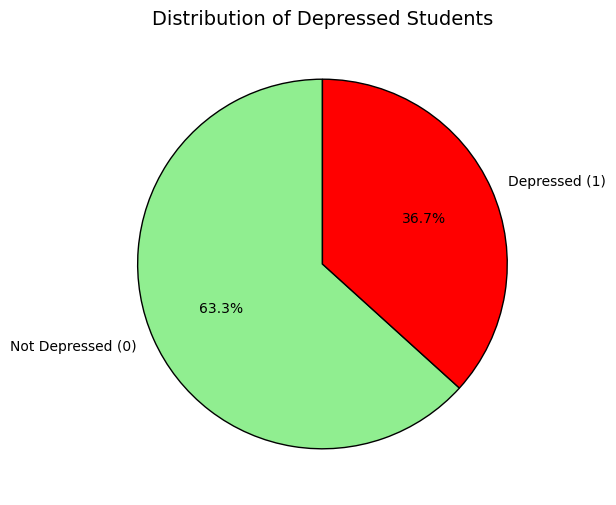

In [131]:
# Count the number of students in each category
depressed_counts = df["Depression"].value_counts()

# Define labels and colors
labels = ["Not Depressed (0)", "Depressed (1)"]
colors = ["lightgreen", "red"]

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")  # Set figure background to white
ax.set_facecolor("white")  # Set axes background to white

# Create pie chart
wedges, texts, autotexts = ax.pie(
    depressed_counts, 
    labels=labels, 
    autopct="%1.1f%%", 
    colors=colors, 
    startangle=90, 
    wedgeprops={"edgecolor": "black"}
)
# Customize text properties
for text in texts + autotexts:
    text.set_color("black")  # Ensure text is readable

# Add title
plt.title("Distribution of Depressed Students", fontsize=14, color="black")

# Show the chart
plt.show()

#### 3.2 Feature Engineering

In [132]:
# # Check the sizes of the majority and minority classes
# num_depressed = len(df[df['Depression'] == 1])
# num_fine = len(df[df['Depression'] == 0])

# # Ensure you're not sampling more than the size of the larger class
# if num_depressed >= num_fine:
#     # Separate the majority and minority classes
#     df_fine = df[df['Depression'] == 0]
#     df_depressed = df[df['Depression'] == 1]
    
#     # Undersample the larger class (Depression == 1) to match the smaller class (Depression == 0)
#     df_minority_undersampled = df_depressed.sample(n=num_fine, random_state=42)

#     # Combine the undersampled larger class with the smaller class
#     df_undersampled = pd.concat([df_minority_undersampled, df_fine])

#     # Shuffle the dataframe to ensure the data is not ordered by class
#     df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

#     # Now df_undersampled has a balanced target variable
#     print(df_undersampled['Depression'].value_counts())
# else:
#     print("Error: The majority class is larger than the minority class, check your data.")

In [133]:
# df = df_undersampled.copy()
# df.sample(5)

In [134]:
df["Health_Condition"] = np.where(
    (df["Dietary_Habits"] == "Unhealthy") & 
    (df["Sleep_Duration"] == "Less than 5 hours"), 
    "Poor_Health",
    "Decent_Health")

In [135]:
df["Health_Condition"].value_counts()

Health_Condition
Decent_Health    24831
Poor_Health       3067
Name: count, dtype: int64

In [136]:
df["Academic_Success"] = np.where(
    (df["Academic_Pressure"] > df["Academic_Pressure"].mean()) & 
    (df["CGPA"] < df["CGPA"].mean()) &
    (df["Study_Satisfaction"] < df["Study_Satisfaction"].mean()),
    "Struggling",
    "Succeeding")

In [137]:
df["Academic_Success"].value_counts()

Academic_Success
Succeeding    25404
Struggling     2494
Name: count, dtype: int64

## 4. Modelling

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [139]:
df_ = df.copy()
df_  = df_.drop(["id"], axis=1)
categorical_cols = df_.select_dtypes(include=['object', 'category']).columns

In [140]:
le = LabelEncoder()
for col in categorical_cols:
    df_[col] = le.fit_transform(df_[col])

In [141]:
X = df_.drop(columns=['Depression'])
y = df_['Depression']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [143]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [144]:
# Extracting the feature importance values, which describe how impactful a feature was in the model:
feature_importance = model.feature_importances_

In [145]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

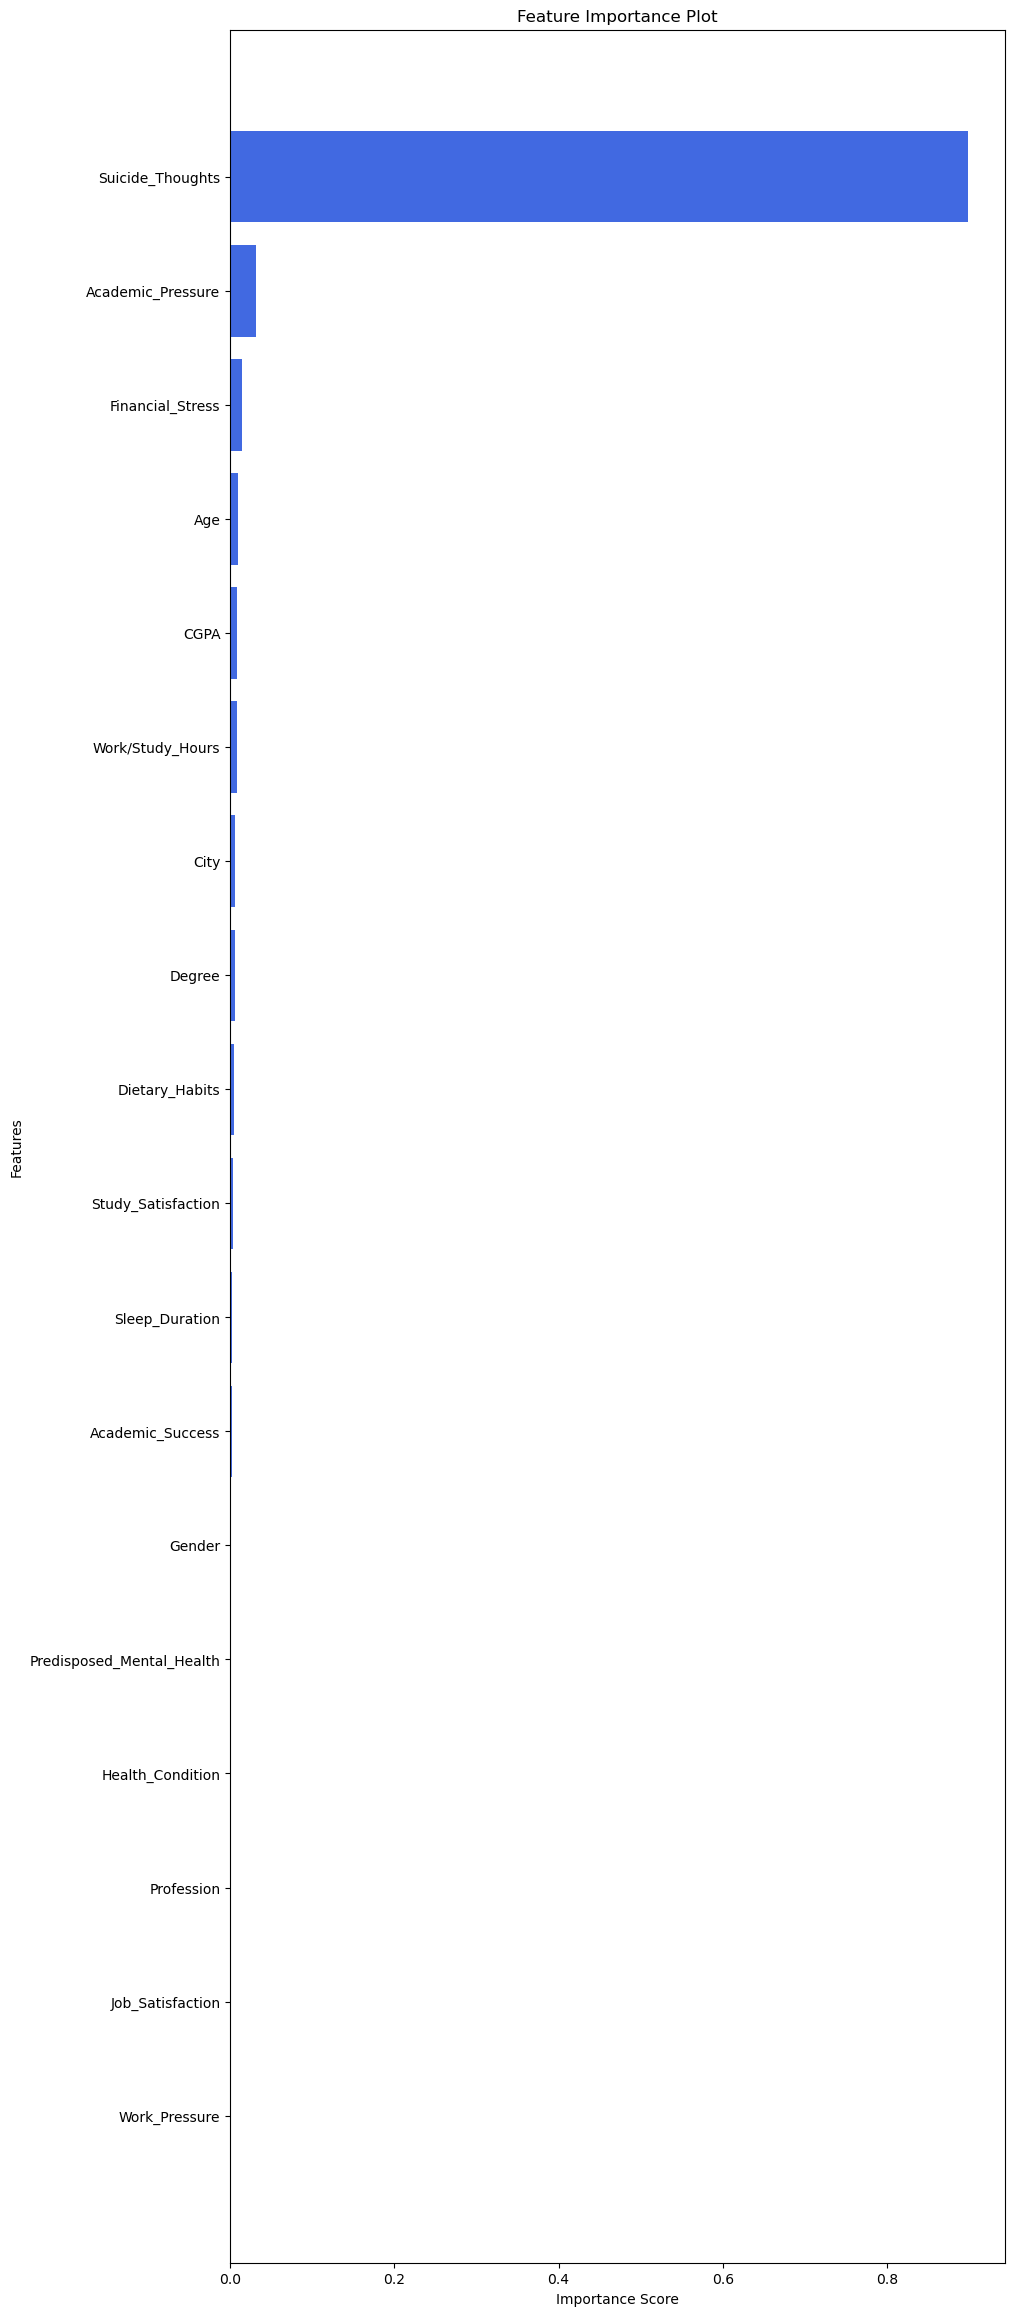

In [146]:
plt.figure(figsize=(10, 29))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()
plt.show()

In [147]:
importance_df.head()

,Feature,Importance
12,Suicide_Thoughts,0.898819
4,Academic_Pressure,0.031204
14,Financial_Stress,0.014553
1,Age,0.010014
6,CGPA,0.008290


In [148]:
main_features_df = importance_df[(importance_df["Feature"] != "Suicide_Thoughts") & (importance_df["Feature"] != "Academic_Pressure")]
main_features_df.head()

,Feature,Importance
14,Financial_Stress,0.014553
1,Age,0.010014
6,CGPA,0.008290
13,Work/Study_Hours,0.008241
2,City,0.006473


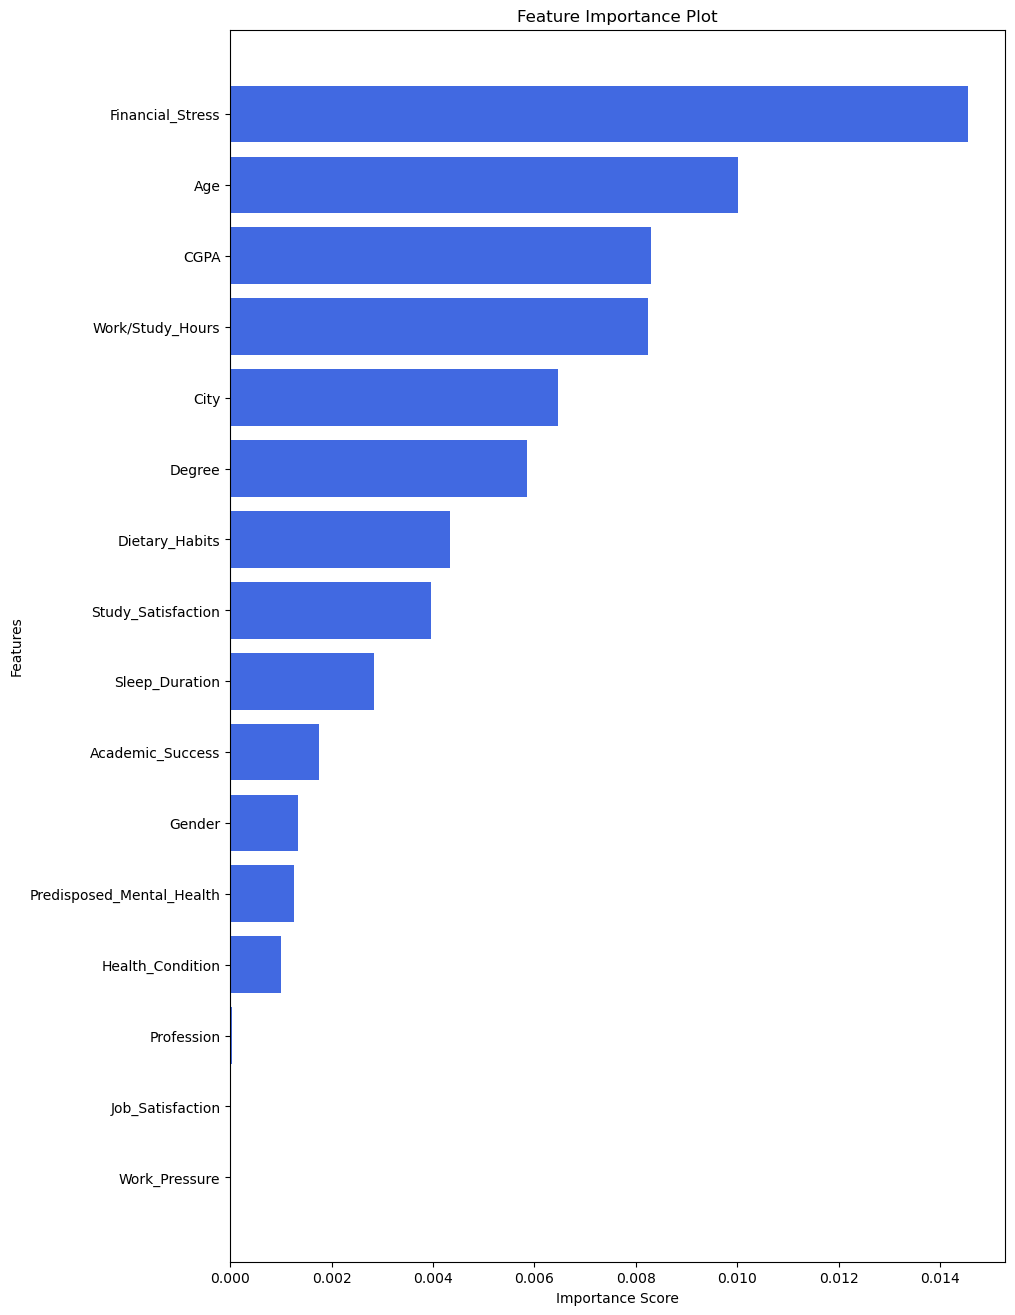

In [149]:
plt.figure(figsize=(10, 16))
plt.barh(main_features_df['Feature'], main_features_df['Importance'], color='royalblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()
plt.show()

In [150]:
main_feature_list = main_features_df['Feature'].tolist()
filtered_df = df_[main_feature_list]

In [151]:
numeric_df = filtered_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

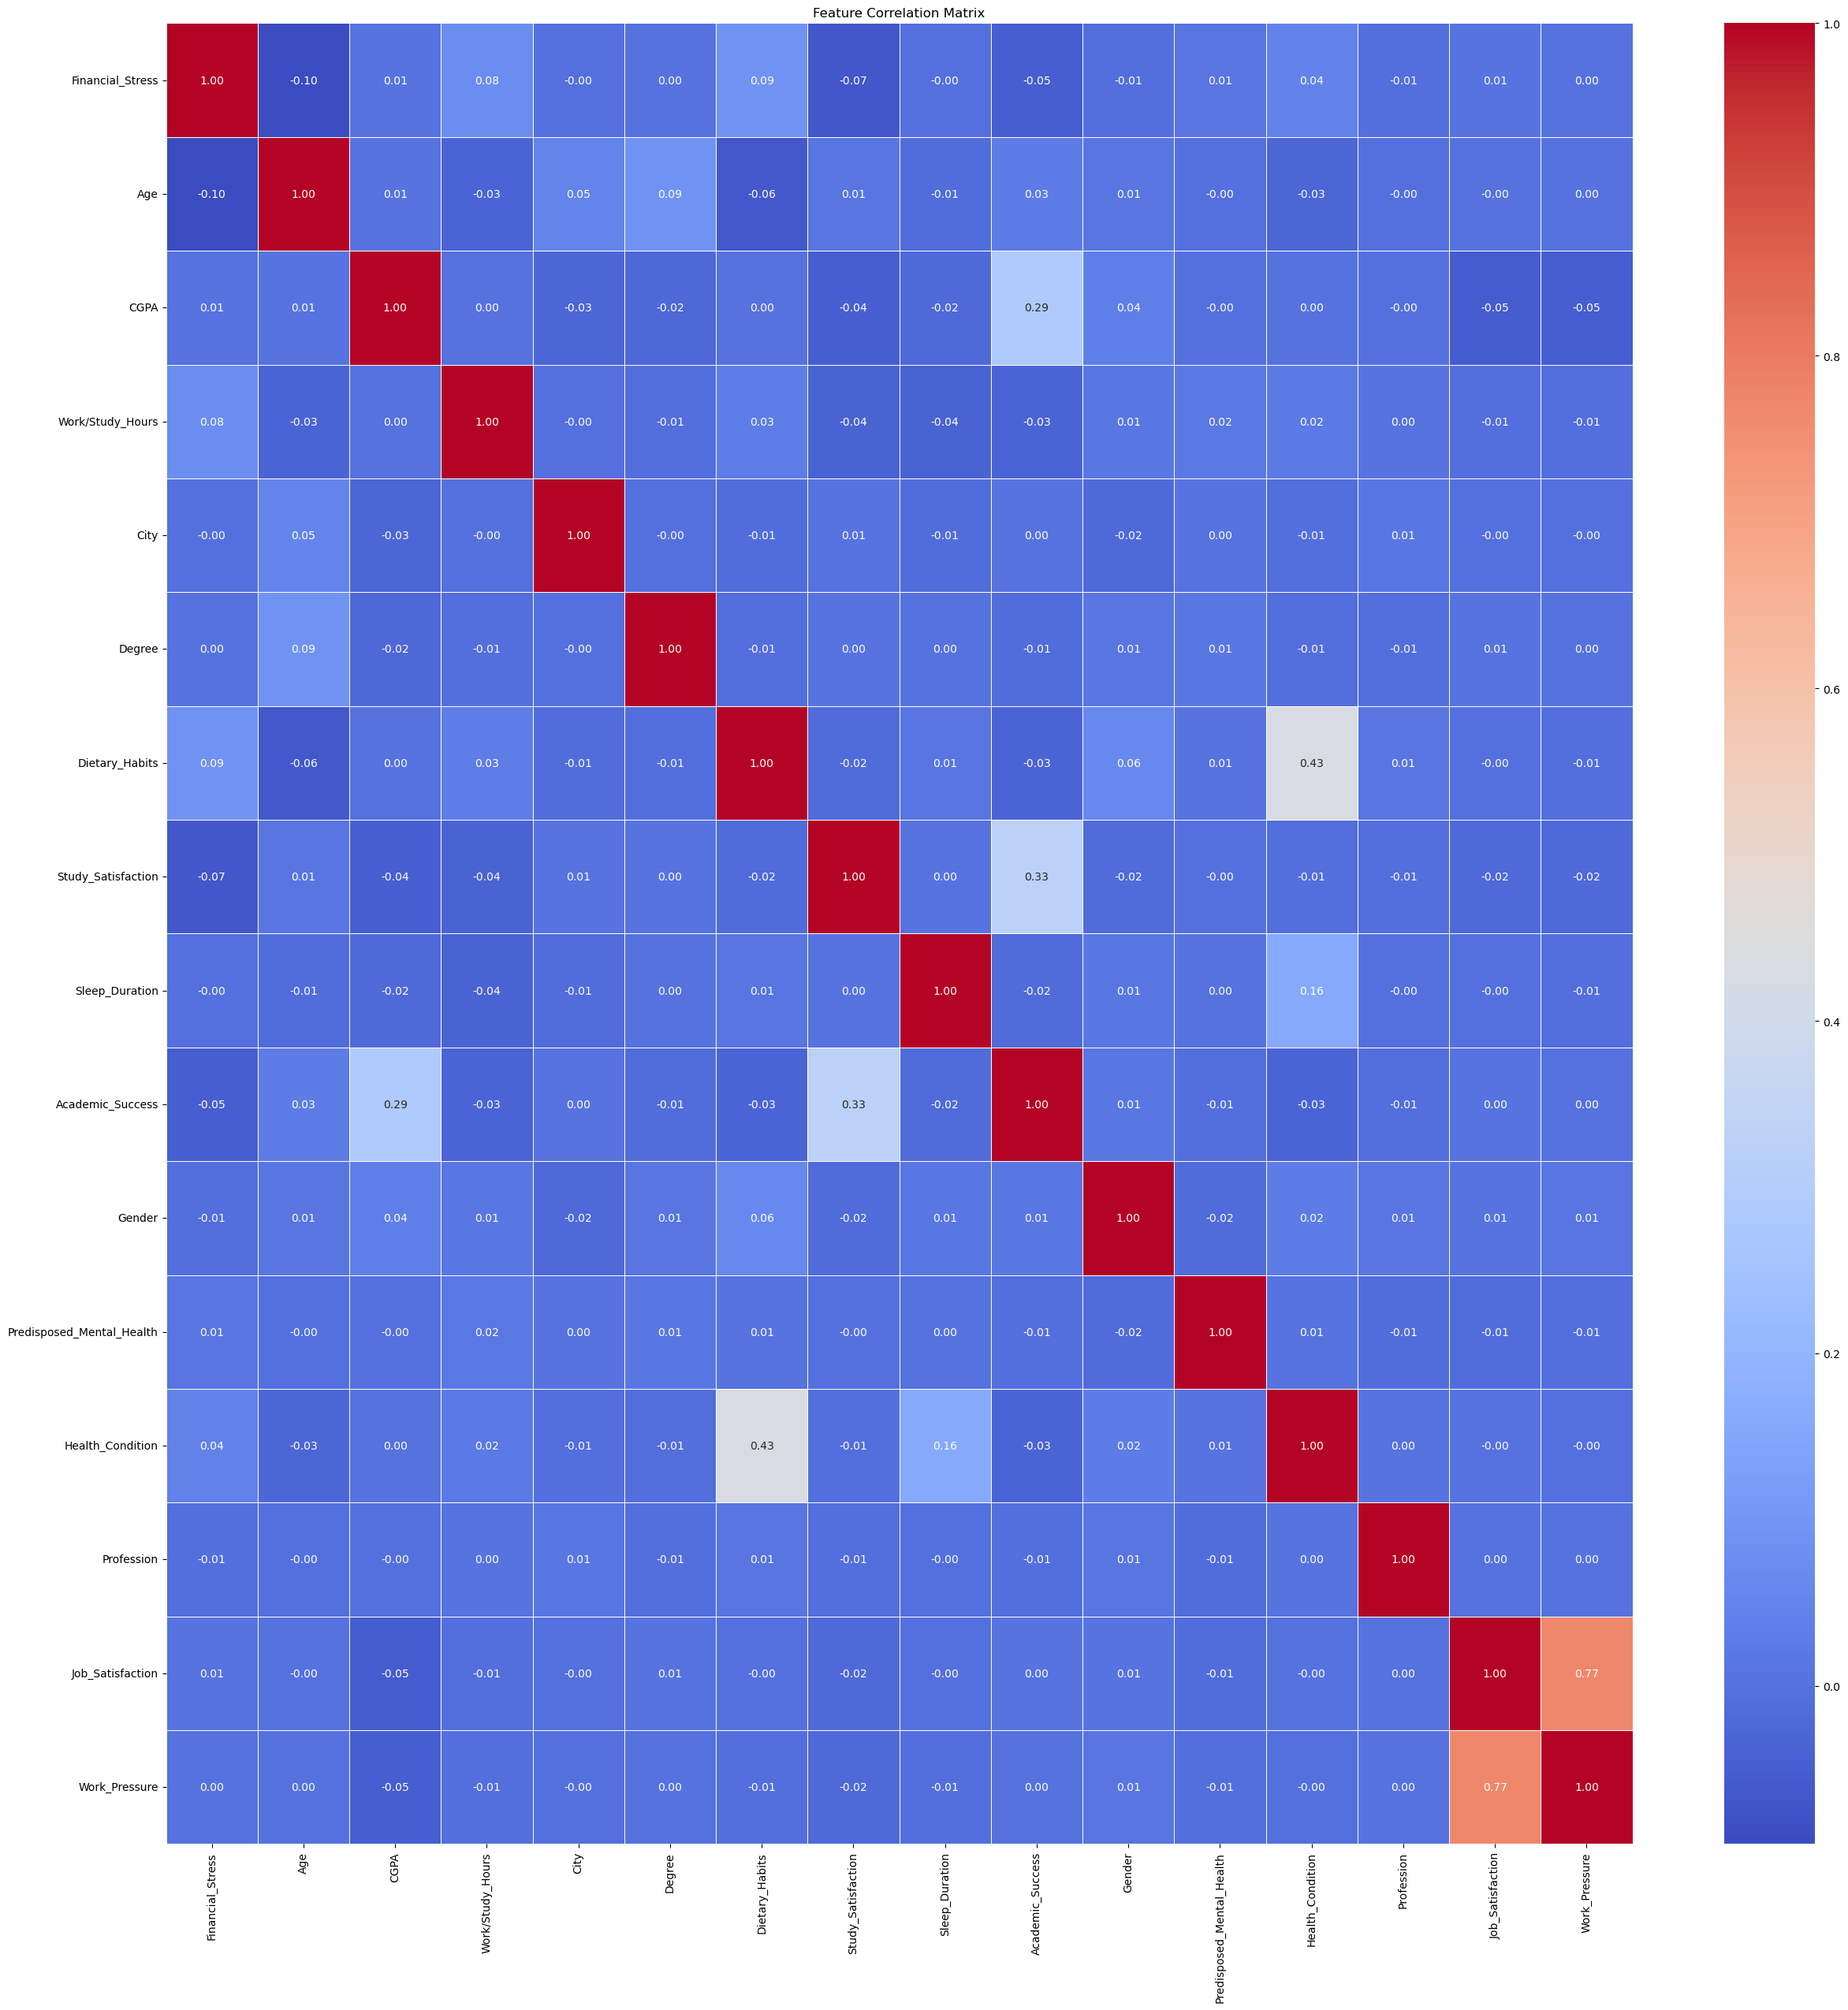

In [152]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [153]:
corr_matrix = numeric_df.corr().abs()

threshold = 0.75
highly_correlated = set()

# Iterate through the matrix and collect features to remove
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Avoid diagonal & duplicate comparisons
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[j]  # Choose one of the correlated pair
            highly_correlated.add(colname)

In [154]:
filtered_features = [col for col in numeric_df.columns if col not in highly_correlated]
filtered_df = numeric_df[filtered_features]

new_corr_matrix = filtered_df.corr()

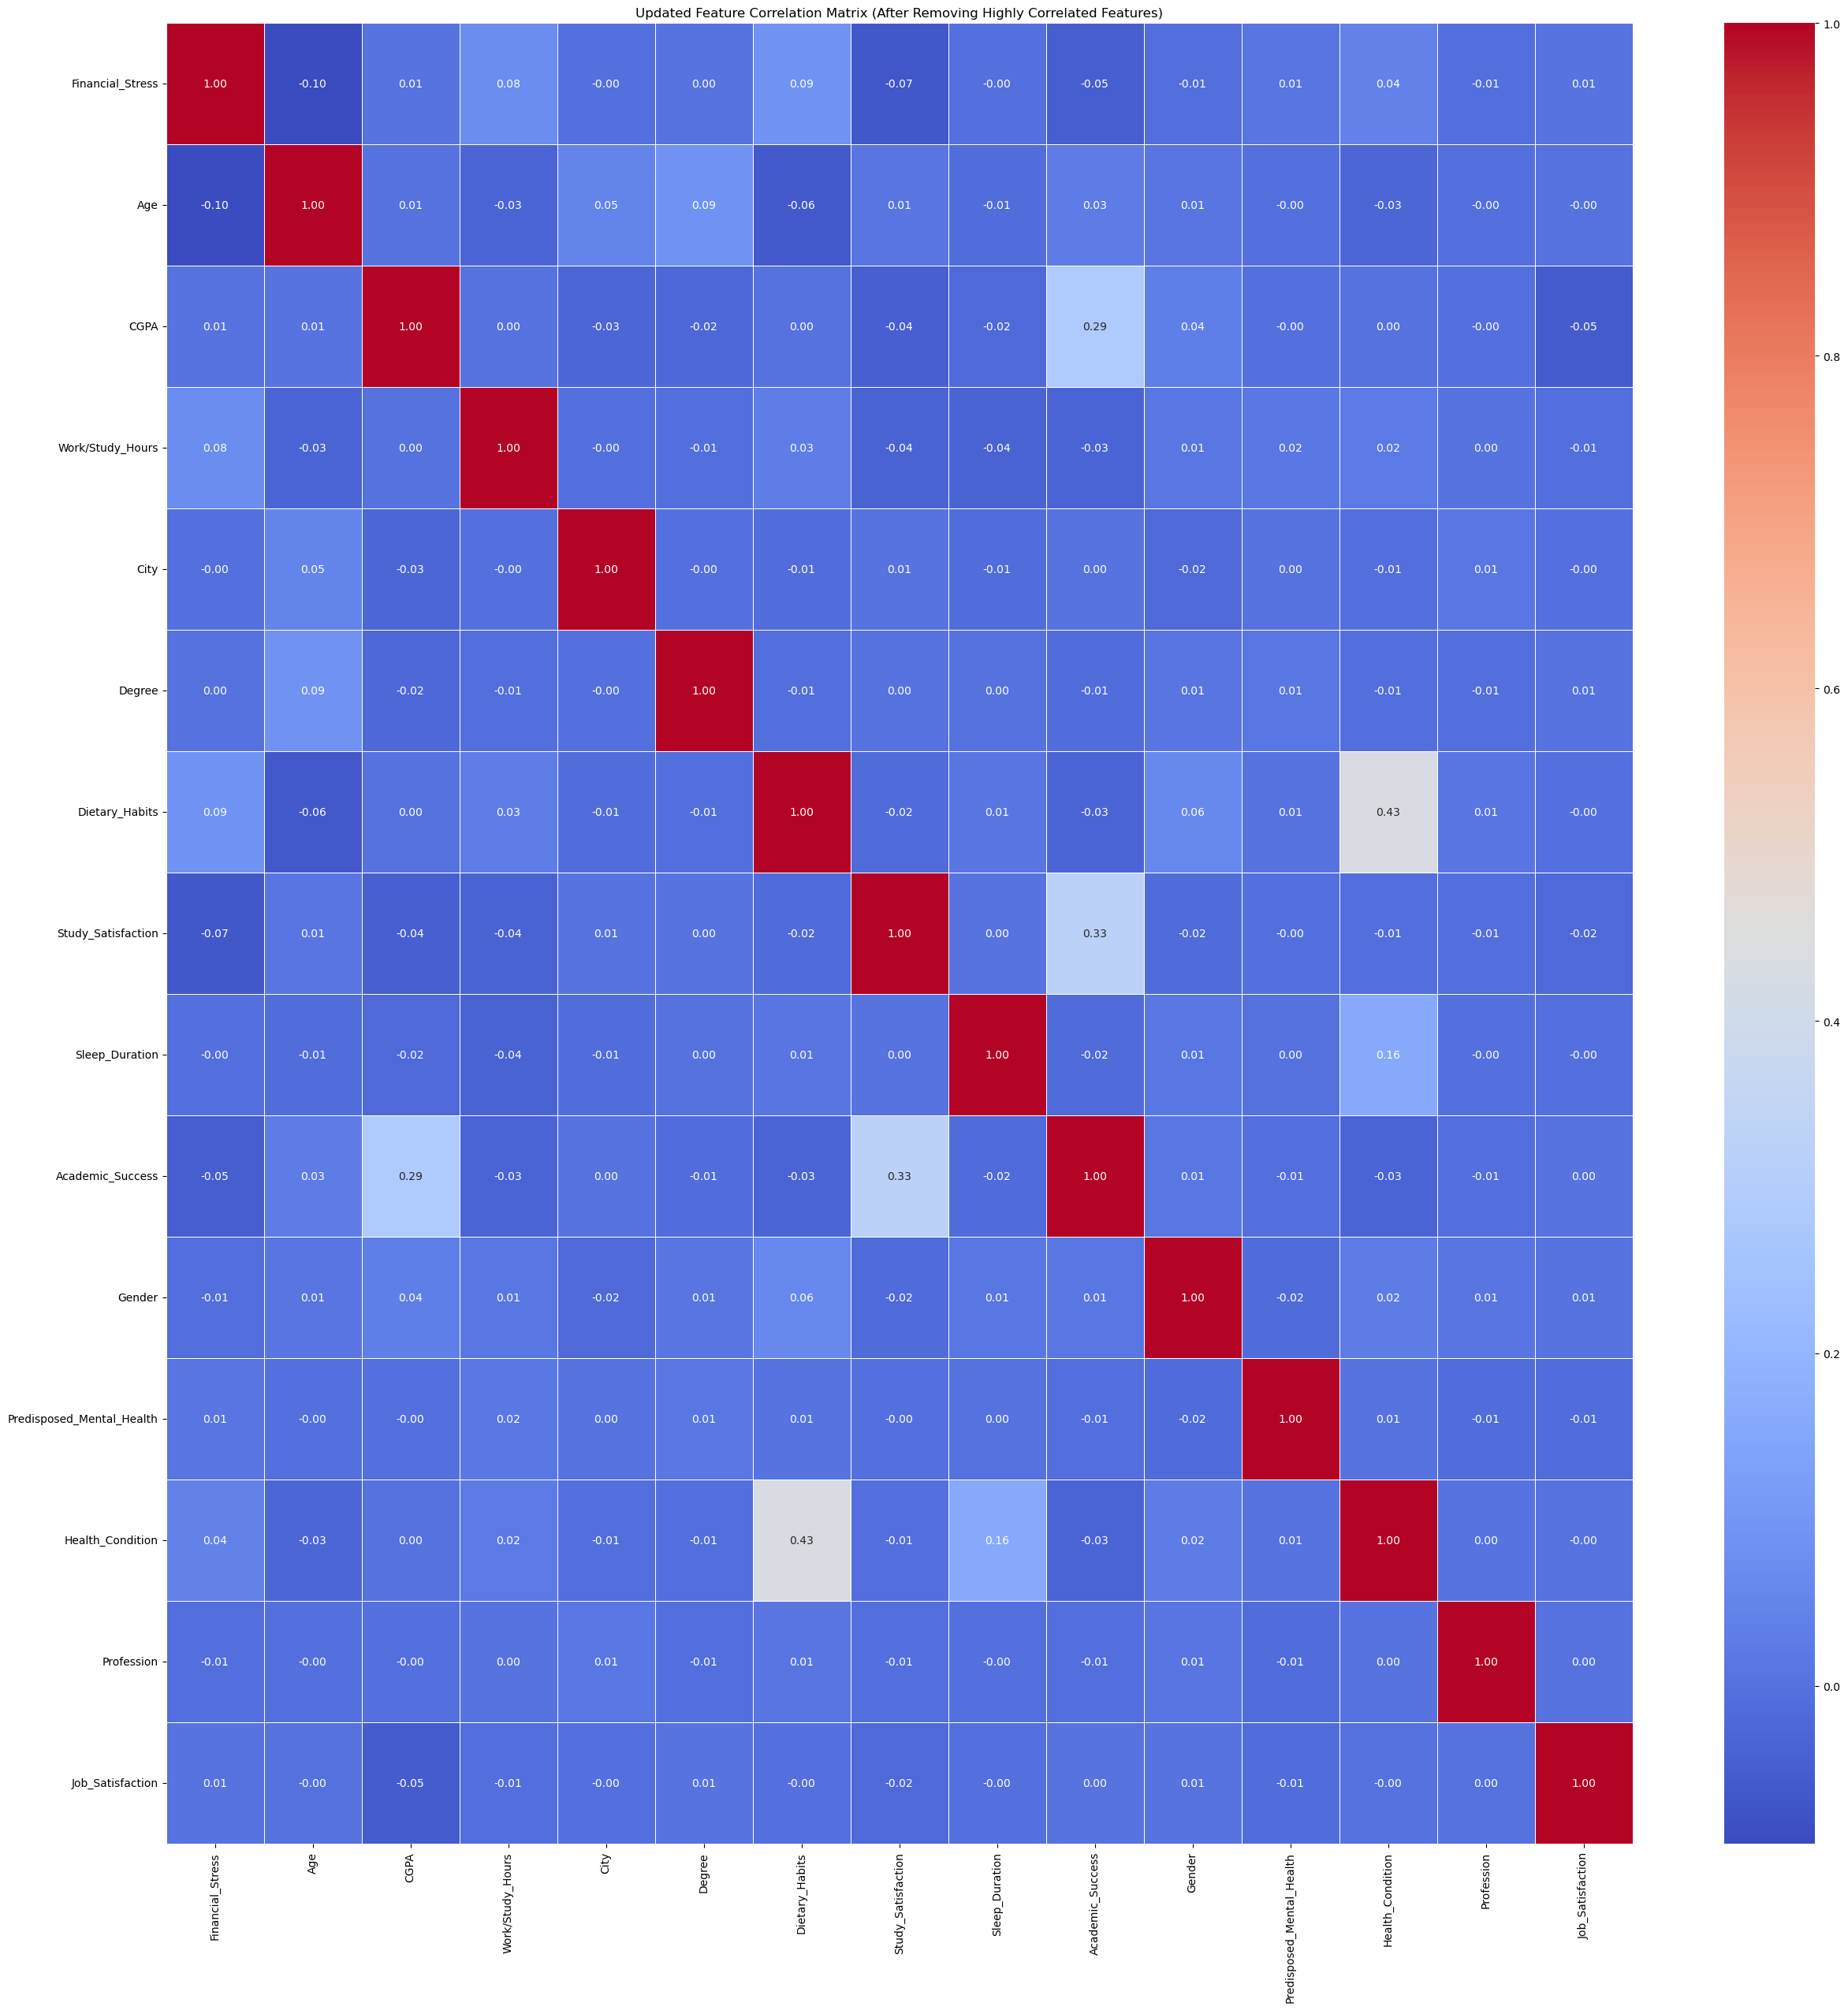

In [155]:
##Final set of features to use:
plt.figure(figsize=(30, 30))
sns.heatmap(new_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Updated Feature Correlation Matrix (After Removing Highly Correlated Features)")
plt.show()

In [156]:
filtered_features += ['Depression']

In [157]:
filtered_features

['Financial_Stress',
 'Age',
 'CGPA',
 'Work/Study_Hours',
 'City',
 'Degree',
 'Dietary_Habits',
 'Study_Satisfaction',
 'Sleep_Duration',
 'Academic_Success',
 'Gender',
 'Predisposed_Mental_Health',
 'Health_Condition',
 'Profession',
 'Job_Satisfaction',
 'Depression']

In [158]:
filtered_features = ['Financial_Stress',
 'Age',
 'CGPA',
 'Work/Study_Hours',
 'City',
 'Degree',
 'Dietary_Habits',
 'Study_Satisfaction',
 'Sleep_Duration',
 'Academic_Success',
 'Gender',
 'Predisposed_Mental_Health',
 'Health_Condition',
 'Depression']

In [159]:
df = df[filtered_features]
df.head()

,Financial_Stress,Age,CGPA,Work/Study_Hours,City,Degree,Dietary_Habits,Study_Satisfaction,Sleep_Duration,Academic_Success,Gender,Predisposed_Mental_Health,Health_Condition,Depression
0,1.0,33.0,8.97,3.0,Visakhapatnam,B.Pharm,Healthy,2.0,5-6 hours,Succeeding,Male,No,Decent_Health,1
1,2.0,24.0,5.90,3.0,Bangalore,BSc,Moderate,5.0,5-6 hours,Succeeding,Female,Yes,Decent_Health,0
2,1.0,31.0,7.03,9.0,Srinagar,BA,Healthy,5.0,Less than 5 hours,Succeeding,Male,Yes,Decent_Health,0
3,5.0,28.0,5.59,4.0,Varanasi,BCA,Moderate,2.0,7-8 hours,Succeeding,Female,Yes,Decent_Health,1
4,1.0,25.0,8.13,1.0,Jaipur,M.Tech,Moderate,3.0,5-6 hours,Succeeding,Female,No,Decent_Health,1


In [160]:
df["Depression"].value_counts()

Depression
1    17656
0    10242
Name: count, dtype: int64

In [161]:
df.head()

,Financial_Stress,Age,CGPA,Work/Study_Hours,City,Degree,Dietary_Habits,Study_Satisfaction,Sleep_Duration,Academic_Success,Gender,Predisposed_Mental_Health,Health_Condition,Depression
0,1.0,33.0,8.97,3.0,Visakhapatnam,B.Pharm,Healthy,2.0,5-6 hours,Succeeding,Male,No,Decent_Health,1
1,2.0,24.0,5.90,3.0,Bangalore,BSc,Moderate,5.0,5-6 hours,Succeeding,Female,Yes,Decent_Health,0
2,1.0,31.0,7.03,9.0,Srinagar,BA,Healthy,5.0,Less than 5 hours,Succeeding,Male,Yes,Decent_Health,0
3,5.0,28.0,5.59,4.0,Varanasi,BCA,Moderate,2.0,7-8 hours,Succeeding,Female,Yes,Decent_Health,1
4,1.0,25.0,8.13,1.0,Jaipur,M.Tech,Moderate,3.0,5-6 hours,Succeeding,Female,No,Decent_Health,1


In [162]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [163]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [164]:
df.head()

,Financial_Stress,Age,CGPA,Work/Study_Hours,City,Degree,Dietary_Habits,Study_Satisfaction,Sleep_Duration,Academic_Success,Gender,Predisposed_Mental_Health,Health_Condition,Depression
0,1.0,33.0,8.97,3.0,51,3,0,2.0,0,1,1,0,0,1
1,2.0,24.0,5.90,3.0,3,10,1,5.0,0,1,0,1,0,0
2,1.0,31.0,7.03,9.0,44,5,0,5.0,2,1,1,1,0,0
3,5.0,28.0,5.59,4.0,49,7,1,2.0,1,1,0,1,0,1
4,1.0,25.0,8.13,1.0,16,17,1,3.0,0,1,0,0,0,1


In [165]:
# Splitting the dataset
X = df.drop(columns=['Depression'])
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

In [167]:
# Convert to LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [168]:
lgbm_model = lgb.LGBMClassifier(
    objective="binary",
    metric=["auc", "binary_logloss"],
    boosting_type="gbdt",
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=-1,
    n_estimators=1000
)

# Define Hyperparameters
params = {
    "objective": "binary:logistic",  # Binary classification
    # "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 6,
    "colsample_bytree": 0.8,
    "subsample": 0.8,
    "n_estimators": 1000,
}

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(**params, use_label_encoder=False)


In [169]:
# Fit the model with early stopping
lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_names=["train", "valid"]
    # ,  # 👈 Important for tracking performance
    # early_stopping_rounds=50,
    # verbose=100
)

# Train Model with Early Stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)]
    # ,
    # eval_metric="auc",
    # early_stopping_rounds=50,
    # verbose=100
)

[0]	validation_0-logloss:0.65389	validation_1-logloss:0.65311
[1]	validation_0-logloss:0.65039	validation_1-logloss:0.65040
[2]	validation_0-logloss:0.64674	validation_1-logloss:0.64765
[3]	validation_0-logloss:0.64372	validation_1-logloss:0.64520
[4]	validation_0-logloss:0.64084	validation_1-logloss:0.64311
[5]	validation_0-logloss:0.63789	validation_1-logloss:0.64083
[6]	validation_0-logloss:0.63589	validation_1-logloss:0.63944
[7]	validation_0-logloss:0.63327	validation_1-logloss:0.63744
[8]	validation_0-logloss:0.63092	validation_1-logloss:0.63576
[9]	validation_0-logloss:0.62925	validation_1-logloss:0.63462
[10]	validation_0-logloss:0.62723	validation_1-logloss:0.63326
[11]	validation_0-logloss:0.62516	validation_1-logloss:0.63191
[12]	validation_0-logloss:0.62379	validation_1-logloss:0.63125
[13]	validation_0-logloss:0.62186	validation_1-logloss:0.63017
[14]	validation_0-logloss:0.62055	validation_1-logloss:0.62938
[15]	validation_0-logloss:0.61895	validation_1-logloss:0.62848
[1

/opt/conda/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:55:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[58]	validation_0-logloss:0.58538	validation_1-logloss:0.61673
[59]	validation_0-logloss:0.58492	validation_1-logloss:0.61680
[60]	validation_0-logloss:0.58451	validation_1-logloss:0.61677
[61]	validation_0-logloss:0.58402	validation_1-logloss:0.61660
[62]	validation_0-logloss:0.58357	validation_1-logloss:0.61646
[63]	validation_0-logloss:0.58315	validation_1-logloss:0.61641
[64]	validation_0-logloss:0.58269	validation_1-logloss:0.61640
[65]	validation_0-logloss:0.58221	validation_1-logloss:0.61655
[66]	validation_0-logloss:0.58177	validation_1-logloss:0.61655
[67]	validation_0-logloss:0.58134	validation_1-logloss:0.61662
[68]	validation_0-logloss:0.58086	validation_1-logloss:0.61668
[69]	validation_0-logloss:0.58044	validation_1-logloss:0.61669
[70]	validation_0-logloss:0.57999	validation_1-logloss:0.61669
[71]	validation_0-logloss:0.57962	validation_1-logloss:0.61663
[72]	validation_0-logloss:0.57917	validation_1-logloss:0.61658
[73]	validation_0-logloss:0.57868	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [170]:
# Make Predictions
y_train_pred = (lgbm_model.predict(X_train) > 0.5).astype(int)
y_test_pred = (lgbm_model.predict(X_test) > 0.5).astype(int)

In [171]:
# Model Metrics
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [172]:

print("-----------------------------------------------------------------")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("-----------------------------------------------------------------")
print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print("-----------------------------------------------------------------")

# Classification Report
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))
print("-----------------------------------------------------------------")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

-----------------------------------------------------------------
Train Accuracy: 0.8453
Test Accuracy: 0.6504
-----------------------------------------------------------------
Train AUC: 0.8061
Test AUC: 0.5868
-----------------------------------------------------------------
Train Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      8209
           1       0.83      0.95      0.89     14109

    accuracy                           0.85     22318
   macro avg       0.86      0.81      0.82     22318
weighted avg       0.85      0.85      0.84     22318

-----------------------------------------------------------------
Test Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.35      0.42      2033
           1       0.69      0.82      0.75      3547

    accuracy                           0.65      5580
   macro avg       0.61      0.59      0.59      5580


In [173]:
# Make Predictions
y_train_pred = (xgb_model.predict_proba(X_train)[:, 1] > 0.5).astype(int)
y_test_pred = (xgb_model.predict_proba(X_test)[:, 1] > 0.5).astype(int)

# Model Metrics
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("-----------------------------------------------------------------")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("-----------------------------------------------------------------")
print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print("-----------------------------------------------------------------")

# Classification Report
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))
print("-----------------------------------------------------------------")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


-----------------------------------------------------------------
Train Accuracy: 0.8772
Test Accuracy: 0.6505
-----------------------------------------------------------------
Train AUC: 0.8454
Test AUC: 0.5881
-----------------------------------------------------------------
Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      8209
           1       0.86      0.97      0.91     14109

    accuracy                           0.88     22318
   macro avg       0.89      0.85      0.86     22318
weighted avg       0.88      0.88      0.87     22318

-----------------------------------------------------------------
Test Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.36      0.43      2033
           1       0.69      0.82      0.75      3547

    accuracy                           0.65      5580
   macro avg       0.61      0.59      0.59      5580
